In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=3) # centers means 3 groups 

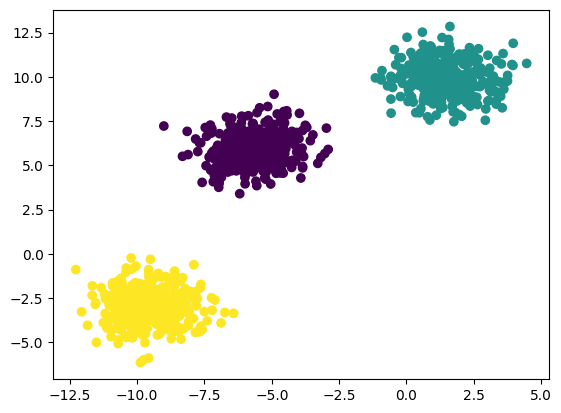

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
## Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardScaler = StandardScaler()
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [6]:
X_train_scaled = standardScaler.fit_transform(X_train)
X_test_scaled = standardScaler.transform(X_test)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Elbow method to select K value
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_) ## sum of square is saved in interia

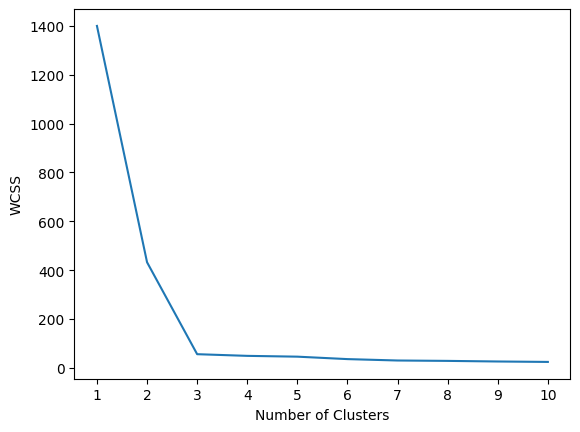

In [9]:
## plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### here we can see that from 3 the graph is starting to stablizing 

In [10]:
kmeans.fit_predict(X_train_scaled)

array([2, 2, 1, 8, 9, 2, 8, 9, 1, 9, 2, 5, 6, 6, 5, 1, 9, 6, 3, 2, 5, 9,
       6, 6, 1, 2, 8, 1, 9, 5, 4, 7, 5, 4, 1, 1, 6, 3, 2, 5, 6, 2, 6, 5,
       2, 2, 5, 7, 5, 2, 1, 3, 5, 3, 5, 3, 2, 1, 6, 8, 1, 3, 8, 5, 6, 9,
       1, 4, 1, 7, 6, 7, 5, 6, 0, 3, 7, 4, 0, 1, 0, 8, 6, 4, 8, 4, 6, 6,
       6, 1, 1, 1, 3, 5, 3, 5, 1, 0, 2, 5, 1, 4, 1, 7, 1, 5, 4, 4, 5, 9,
       5, 2, 6, 3, 8, 1, 3, 9, 1, 6, 8, 6, 6, 5, 2, 3, 3, 9, 2, 1, 8, 5,
       5, 6, 6, 1, 9, 9, 6, 5, 4, 5, 4, 0, 6, 5, 4, 2, 4, 9, 2, 6, 4, 6,
       1, 1, 4, 5, 7, 9, 1, 6, 1, 5, 9, 4, 2, 1, 0, 9, 2, 4, 3, 2, 1, 5,
       5, 5, 7, 5, 3, 4, 6, 6, 2, 8, 4, 5, 1, 4, 6, 3, 1, 2, 3, 9, 5, 8,
       7, 1, 3, 4, 2, 9, 4, 1, 2, 6, 6, 7, 8, 5, 1, 5, 9, 5, 6, 3, 0, 5,
       7, 0, 1, 4, 2, 8, 0, 5, 4, 0, 5, 6, 1, 5, 5, 6, 6, 6, 6, 5, 5, 7,
       7, 7, 6, 0, 1, 5, 3, 5, 1, 0, 8, 6, 7, 1, 0, 0, 4, 0, 5, 6, 2, 5,
       5, 4, 7, 5, 5, 1, 6, 1, 6, 7, 6, 5, 1, 6, 3, 1, 3, 5, 1, 8, 2, 1,
       0, 1, 5, 6, 5, 5, 7, 1, 3, 5, 4, 5, 1, 8, 2,

In [11]:
y_pred=kmeans.predict(X_test_scaled)

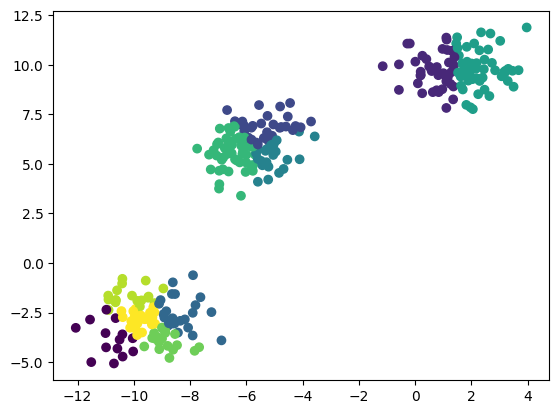

In [12]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

#### Validating the K Values
#### - knee locator
#### - Silhoutee Scoring

In [13]:
from kneed import KneeLocator

kl=KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

In [14]:
kl.elbow ## ll give K value

3

In [15]:
## Silhoutee Score
from sklearn.metrics import silhouette_score

In [16]:
silhouette_coefficient=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train_scaled)
  score = silhouette_score(X_train_scaled, kmeans.labels_)
  silhouette_coefficient.append(score)

print(silhouette_coefficient)

[0.659409120369442, 0.7883372042904863, 0.6345891216247123, 0.4958127223686604, 0.5063329149050155, 0.352740059316968, 0.33896793839000317, 0.32805057354235684, 0.33655542284216833]


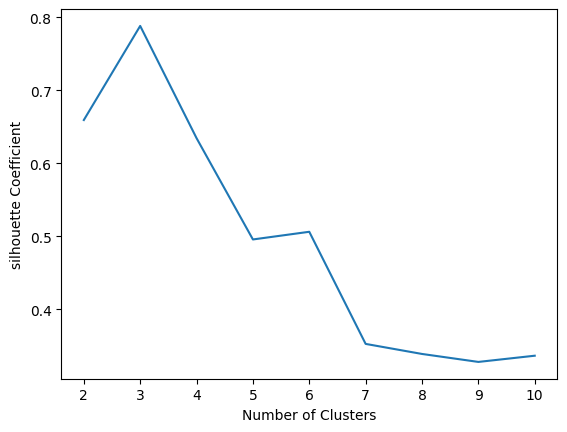

In [17]:
plt.plot(range(2,11), silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette Coefficient")
plt.show()

As at 3 the graph is at peak,we can say that K=3